In [ ]:
# !wget "https://s3.amazonaws.com/fast-ai-imageclas/oxford-102-flowers.tgz"

In [ ]:
# Unzipping the file
# !tar -xzvf "/content/oxford-102-flowers.tgz"

In [ ]:
# !unzip "/content/drive/MyDrive/Image_Data/dataprepare_machinelearning_pipeline.zip"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib # to access files inside folders eaasily
import os
import re
import scipy
from skimage.transform import resize, rescale
from PIL import Image
from sklearn import metrics 
import skimage.io
import skimage
from glob import glob
from sklearn.model_selection import train_test_split

In [ ]:
skimage.__version__

'0.18.3'

In [ ]:
np.__version__

'1.19.5'

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
import sklearn
sklearn.__version__

'1.0.1'

In [ ]:
len(os.listdir("/content/data")) # checking number of image files in the folder

20

In [ ]:
folder = os.listdir('data')
print(folder)

['ElephantHead', 'TigerHead', 'MonkeyHead', 'DuckHead', 'HumanHead', 'BearHead', 'PigeonHead', 'MouseHead', 'DeerHead', 'ChickenHead', 'DogHead', 'Natural', 'PandaHead', 'RabbitHead', 'CowHead', 'EagleHead', 'WolfHead', 'CatHead', 'LionHead', 'SheepHead']


In [ ]:
all_path =[]
for f in folder:
    all_path += glob('./data/{}/*.jpg'.format(f))

all_path[:5]

['./data/ElephantHead/0000000030.jpg',
 './data/ElephantHead/0000000020.jpg',
 './data/ElephantHead/0000000086.jpg',
 './data/ElephantHead/0000000052.jpg',
 './data/ElephantHead/0000000038.jpg']

In [ ]:
len(all_path)

2023

In [ ]:
img_all = skimage.io.ImageCollection(all_path)

In [ ]:
len(img_all)

2023

In [ ]:
type(img_all.files)

list

In [ ]:
img_all.files[0]

'./data/BearHead/bearfrontal0001.jpg'

In [ ]:
def extract_label(text):
    try:
        label = re.search(r'./data/(.*?)Head/',text).group(1)
    except:
        label = re.search(r'./data/(.*?)/',text).group(1)
        
    return label.lower()

In [ ]:
labels = list(map(extract_label,img_all.files))

In [ ]:
len(labels)

2023

In [ ]:
def buffer(io):
  # print(io.shape)
  # io = resize(image = io, output_shape= (224, 224, 3))
  # print(io.shape)
  return io


img_all_arrs = np.array(list(map(buffer,img_all)))

In [ ]:
img_all_arrs.shape

(2023, 80, 80, 3)

In [ ]:
data = dict()

data["description"] = "There are 20 classes and 2057 images are there. All the images are 80 X 80 (rgb)"
data['data'] = img_all_arrs
data['target'] = labels
data['labels'] = set(labels)

In [ ]:
# save the file in pickle
import pickle
import collections

In [ ]:
# pickle.dump(data, open("102_flowers_data.pickle", "wb"))

In [ ]:
value_count = collections.Counter(data["target"])

In [ ]:
value_count.values()

dict_values([101, 159, 100, 101, 101, 132, 102, 96, 100, 100, 97, 100, 100, 8, 116, 98, 100, 100, 112, 100])

<BarContainer object of 20 artists>

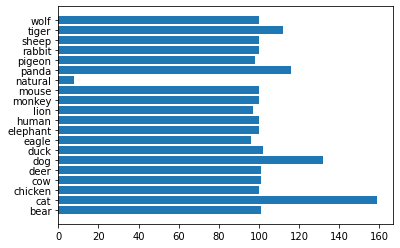

In [ ]:
plt.barh(list(value_count.keys()), list(value_count.values()))

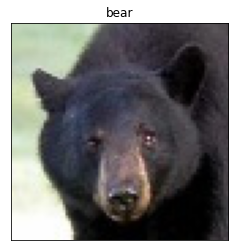

In [ ]:
plt.imshow(data["data"][0])
plt.xticks([]),plt.yticks([])
plt.title(data["target"][0])
plt.show()

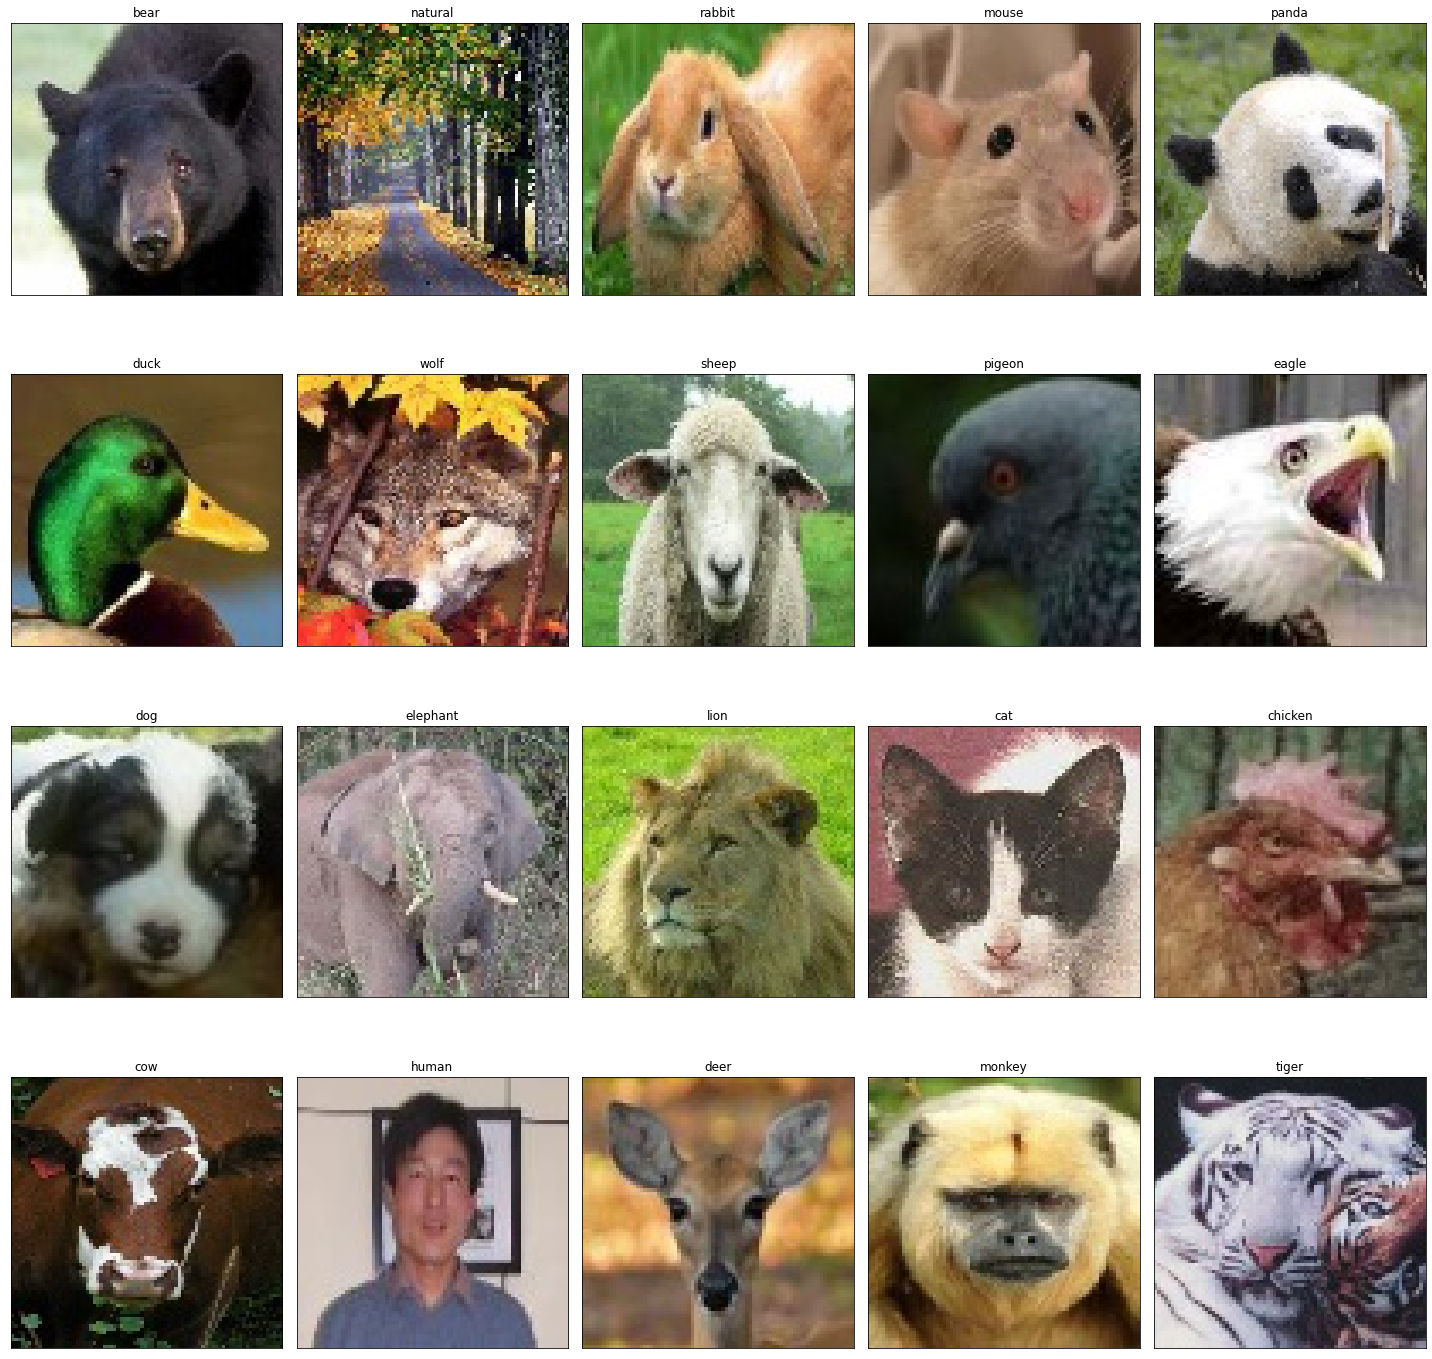

In [ ]:
plt.figure(figsize = (20, 20))
for j,i in enumerate(data["labels"]):
  index = data["target"].index(i)
  img = data["data"][index]
  plt.subplot(4, 5, j+1)
  plt.imshow(img)
  plt.xticks([]),plt.yticks([])
  plt.title(data["target"][index])

plt.tight_layout()
plt.show()

## **Feature extraction**

HOG Feature extraction:- [URL]("https://www.analyticsvidhya.com/blog/2019/09/[feature]-engineering-images-introduction-hog-feature-descriptor/")

In [ ]:
img_array = data["data"][0]

In [ ]:
img_array.shape

(80, 80, 3)

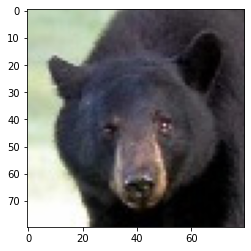

In [ ]:
plt.imshow(img_array)
plt.show()

In [ ]:
from skimage import feature

In [ ]:
np.max(img_array)

255

In [ ]:
# transformation
# img_scaled = rescale(img_array, 1/3).reshape((75,75))
# print(img_scaled.shape)
gray = skimage.color.rgb2gray(img_array)

feature_vector, hog_img = feature.hog(gray, orientations = 9,
                                              pixels_per_cell = (14,14),
                                              cells_per_block = (2,2),
                                              visualize = True)

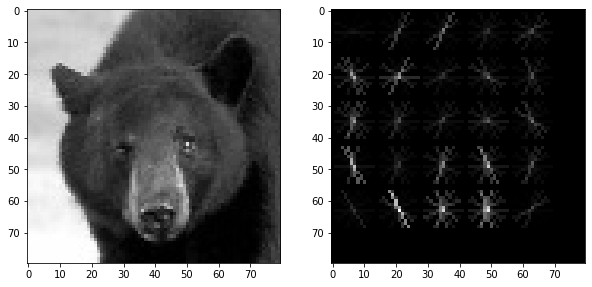

In [ ]:
plt.figure(figsize = (10, 12))
plt.subplot(1,2,1)
plt.imshow(gray, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(hog_img, cmap="gray")
plt.show()

# Train Test Split

In [ ]:
X = data["data"]
y = data["target"]

In [ ]:
X.shape, len(y)

((2023, 80, 80, 3), 2023)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)

# **Preprocessing**
 - Grayscale
 - HOG(Histogram Oriented Gradient)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class rgb2gray_transform(BaseEstimator, TransformerMixin):
  import skimage.color

  def __init__(self):
      pass
  
  def fit(self, X, y= None):
      return self

  def transform(self, X, y=None):
      return np.array([skimage.color.rgb2gray(x) for x in X])

In [ ]:
X_train.shape

(1618, 80, 80, 3)

In [ ]:
rgb2gray = rgb2gray_transform()
X_train_gray =rgb2gray.fit_transform(X_train)

In [ ]:
X_train_gray.shape

(1618, 80, 80)

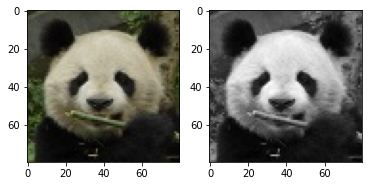

In [ ]:
plt.subplot(1,2,1)
plt.imshow(X_train[0])

plt.subplot(1,2,2)
plt.imshow(X_train_gray[0], cmap="gray")
plt.show()

In [ ]:
class hogtransformer(BaseEstimator, TransformerMixin):
  import skimage.feature
  def __init__(self, orientations = 9, pixels_per_cell = (8, 8), cells_per_block = (3,3)):
    self.orientations = orientations
    self.pixels_per_cell = pixels_per_cell
    self.cells_per_block = cells_per_block


  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    def local_hog(img):
      hog_features = skimage.feature.hog(img, orientations = self.orientations,
                                         pixels_per_cell = self.pixels_per_cell,
                                         cells_per_block = self.cells_per_block)
      return hog_features

    hfeatures = np.array([local_hog(x) for x in X])
    return hfeatures

In [ ]:
hogt = hogtransformer()

In [ ]:
X_train_gray.shape

(1020, 224, 224)

In [ ]:
X_train_hog = hogt.fit_transform(X_train_gray)

# **Training Machine Learning Model**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
model_sgd = SGDClassifier(loss = "hinge", learning_rate="adaptive",
                          early_stopping = True, eta0 = 0.1)

In [ ]:
X_train.shape, X_test.shape

((1618, 80, 80, 3), (405, 80, 80, 3))

In [ ]:
gray = rgb2gray_transform()
hog = hogtransformer()
scale = StandardScaler()

In [ ]:
# pipeline
# Step:- 1: convert into grayscale
X_train_gray = gray.fit_transform(X_train)
# Step:- 2: Extract the features
X_train_hog = hog.fit_transform(X_train_gray)
# Step:- 3: Normalization
X_train_scale = scale.fit_transform(X_train_hog)
# Step:- 4: Machine Learning
model_sgd.fit(X_train_scale, y_train)

SGDClassifier(early_stopping=True, eta0=0.1, learning_rate='adaptive')

In [ ]:
# Step:- 1: convert into grayscale
X_valid_gray = gray.fit_transform(X_test)
# Step:- 2: Extract the features
X_valid_hog = hog.fit_transform(X_valid_gray)
# Step:- 3: Normalization
X_valid_scale = scale.transform(X_valid_hog)

y_pred = model_sgd.predict(X_valid_scale)

In [ ]:
y_pred

array([ 6, 46, 97, ..., 91, 71,  5])

# **Model Evaluation**

In [ ]:
cr = metrics.classification_report(y_valid, y_pred, output_dict=True)
pd.DataFrame(cr)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,accuracy,macro avg,weighted avg
precision,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.071429,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.0,0.008824,0.010754,0.010754
recall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.100000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,0.008824,0.008824,0.008824
f1-score,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.125000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095238,0.0,0.008824,0.009467,0.009467
support,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,0.008824,1020.000000,1020.000000


In [ ]:
metrics.cohen_kappa_score(y_valid, y_pred)

-0.000990099009900991

# **Pipeline Model**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
model_pipe = Pipeline([
                       ("grayscale", rgb2gray_transform()),
                       ("hogtransform", hogtransformer(orientations = 9,
                                                       pixels_per_cell = (10, 10),
                                                       cells_per_block = (3,3))),
                       ("scaler", StandardScaler()),
                       ("sgd", SGDClassifier(loss = "hinge", learning_rate = "adaptive",
                                             early_stopping = True, eta0 = 0.1))
])

In [ ]:
# model_pipe.fit(X_train, y_train)

# **Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
estimator = Pipeline([
                       ("grayscale", rgb2gray_transform()),
                       ("hogtransform", hogtransformer()),
                       ("scaler", StandardScaler()),
                       ("sgd", SGDClassifier())
])

In [ ]:
param_grid = [
      {
          "hogtransform__orientations": [7,8,9,10],
          "hogtransform__pixels_per_cell": [(7,7), (8,8), (9,9)],
          "hogtransform__cells_per_block": [(2,2), (3,3)],
          "sgd__loss": ["hinge", "squared_hinge", "perceptron"],
          "sgd_learning_rate": ["optimal"]
      },
      {
          "hogtransform__orientations": [7,8,9,10],
          "hogtransform__pixels_per_cell": [(7,7), (8,8), (9,9)],
          "hogtransform__cells_per_block": [(2,2), (3,3)],
          "sgd__loss": ["hinge", "squared_hinge", "perceptron"],
          "sgd_learning_rate": ["adaptive"],
          "sgd__eta0": [0.001, 0.01]
      }
]

In [ ]:
model_grid = GridSearchCV(estimator,
                          param_grid = param_grid, scoring = "accuracy",
                          n_jobs = -1, cv = 3, verbose = 2)

In [ ]:
# model_grid.fit(X_train, y_train)
# model_grid.best_estimator_

# Make Pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline1 = make_pipeline(rgb2gray_transform(),
                          hogtransformer(orientations = 10,
                                         pixels_per_cell= (8,8),
                                         cells_per_block = (2,2)))

In [ ]:
feature_vector = pipeline1.fit_transform(X_train)

In [ ]:
scaler = StandardScaler()
transformed_xtrain = scaler.fit_transform(feature_vector)

In [ ]:
model = SGDClassifier(learning_rate = "optimal", loss = "hinge", alpha = 0.01,
                      early_stopping = True)

In [ ]:
model.fit(transformed_xtrain, y_train)

SGDClassifier(alpha=0.01, early_stopping=True)

In [ ]:
# Evaluating the model
feature_vector = pipeline1.fit_transform(X_test)
transformed_x = scaler.fit_transform(feature_vector)
y_pred = model.predict(transformed_x)

In [ ]:
report = pd.DataFrame(metrics.classification_report(y_test, y_pred, output_dict = True)).T
report

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
bear,0.809524,0.850000,0.829268,20.000000
cat,0.707317,0.906250,0.794521,32.000000
chicken,0.857143,0.900000,0.878049,20.000000
cow,0.631579,0.600000,0.615385,20.000000
deer,0.772727,0.850000,0.809524,20.000000
dog,0.689655,0.740741,0.714286,27.000000
duck,0.833333,0.750000,0.789474,20.000000
eagle,0.687500,0.578947,0.628571,19.000000
elephant,0.739130,0.850000,0.790698,20.000000
human,0.950000,0.950000,0.950000,20.000000


In [ ]:
pickle.dump(model, open("image_classification_model.pickle", "wb"))

In [ ]:
pickle.dump(scaler, open("scaler.pickle", "wb"))

# Pipeline for new image

In [ ]:
# pipeline model
image = skimage.io.imread("/content/Images/eagle.jpg")
# Resize the image
image_resize = skimage.transform.resize(image, (80, 80))
# After resizing the image gets normalised
# So, rescaling it is important
image_scale = 255*image_resize
image_transform = image_scale.astype(np.uint8) # converting float values to int
# converting rgb to gray
gray = skimage.color.rgb2gray(image_transform)
feature_vector = skimage.feature.hog(gray,
                                     orientations = 10,
                                     pixels_per_cell = (8,8),
                                     cells_per_block = (2,2))

In [ ]:
feature_vector

array([0.20979654, 0.02552764, 0.25555313, ..., 0.04803068, 0.0377739 ,
       0.00724294])

In [ ]:
model = pickle.load(open("/content/image_classification_model.pickle", "rb"))
scaler = pickle.load(open("/content/scaler.pickle", "rb"))

In [ ]:
feature_vector.shape

(3240,)

In [ ]:
scale = scaler.transform(feature_vector.reshape(1,-1))
result = model.predict(scale)

In [ ]:
result

array(['eagle'], dtype='<U8')

In [ ]:
# Calculating the probability of predict a class
decision_value = model.decision_function(scale)

In [ ]:
decision_value

array([[-155.19054574, -194.92765496, -113.10940541, -193.52716337,
        -226.18604595, -150.83436089,  -31.55082563,    8.26468743,
        -267.85428041, -168.41320399, -266.24053619,  -45.25419573,
        -228.01960186, -196.79616261, -102.89884968,  -84.00969545,
        -136.68299063, -239.98434473, -166.44252897, -356.08513265]])

In [ ]:
labels = model.classes_

In [ ]:
decision_value = decision_value.flatten() # to convert it into a 1d array

In [ ]:
# calculate z score
z = scipy.stats.zscore(decision_value)
prob_value = scipy.special.softmax(z)
prob_value

array([0.03461147, 0.02186746, 0.05628662, 0.02222423, 0.01523798,
       0.03639834, 0.14444707, 0.22883571, 0.00941487, 0.0297072 ,
       0.00959209, 0.1232929 , 0.01491852, 0.02140037, 0.06333548,
       0.07878485, 0.04286478, 0.01299213, 0.03039147, 0.00339646])

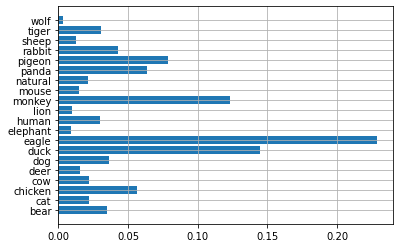

In [ ]:
plt.barh(labels, prob_value)
plt.grid()

In [ ]:
prob_value.argsort()

array([19,  8, 10, 17, 12,  4, 13,  1,  3,  9, 18,  0,  5, 16,  2, 14, 15,
       11,  6,  7])

In [ ]:
# top 5 probability values
top_5_prob_ind = prob_value.argsort()[::-1][:5]

In [ ]:
top_5_prob_ind

array([ 7,  6, 11, 15, 14])

In [ ]:
top_labels = labels[top_5_prob_ind]
top_prob = prob_value[top_5_prob_ind]

In [ ]:
top_prob, top_labels

(array([0.22883571, 0.14444707, 0.1232929 , 0.07878485, 0.06333548]),
 array(['eagle', 'duck', 'monkey', 'pigeon', 'panda'], dtype='<U8'))

In [ ]:
top_dict = {}

for key, val in zip(top_labels, top_prob):
  top_dict[key] = np.round(val, 2)

In [ ]:
top_dict

{'duck': 0.14, 'eagle': 0.23, 'monkey': 0.12, 'panda': 0.06, 'pigeon': 0.08}

In [ ]:
def pipeline_model(path, scaler_transform, model_sgd):
    # pipeline model
    image = skimage.io.imread(path)
    # Resize the image
    image_resize = skimage.transform.resize(image, (80, 80))
    # After resizing the image gets normalised
    # So, rescaling it is important
    image_scale = 255*image_resize
    image_transform = image_scale.astype(np.uint8) # converting float values to int
    # converting rgb to gray
    gray = skimage.color.rgb2gray(image_transform)
    feature_vector = skimage.feature.hog(gray,
                                        orientations = 10,
                                        pixels_per_cell = (8,8),
                                        cells_per_block = (2,2))
    
    #scaling
    scale = scaler_transform.transform(feature_vector.reshape(1,-1))
    result = model_sgd.predict(scale)

    # decision value
    decision_value = model.decision_function(scale).flatten()

    labels = model_sgd.classes_

    # Calculating confidence interval
    z = scipy.stats.zscore(decision_value)
    prob_value = scipy.special.softmax(z)

    # Getting top 5 labels
    top_5_prob_ind = prob_value.argsort()[::-1][:5]
    top_labels = labels[top_5_prob_ind]
    top_prob = prob_value[top_5_prob_ind]

    # Putting all this in dictionary
    top_dict = {}

    for key, val in zip(top_labels, top_prob):
      top_dict[key] = np.round(val, 2)

    return top_dict

In [ ]:
res = pipeline_model("/content/Images/eagle.jpg", scaler, model)
res

{'duck': 0.14, 'eagle': 0.23, 'monkey': 0.12, 'panda': 0.06, 'pigeon': 0.08}